## Chronic Kidney Disease Classification Project

In [1]:
# import necessary libraries like numpy, pandas, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

In [2]:
# reading dataset
chronic_df = pd.read_csv("C:\\Users\\ACER\\Downloads\\kidney_disease.csv")

In [3]:
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class	
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 
%
<h3>Attribute Information :</h3>
- 1.Age(numerical)
  	  	age in years
- 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
-	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
- 	4.Albumin(nominal)
		  al - (0,1,2,3,4,5)
-	5.Sugar(nominal)
		  su - (0,1,2,3,4,5)
- 	6.Red Blood Cells(nominal)
		  rbc - (normal,abnormal)
- 	7.Pus Cell (nominal)
		  pc - (normal,abnormal)
- 	8.Pus Cell clumps(nominal)
		  pcc - (present,notpresent)
- 	9.Bacteria(nominal)
		  ba  - (present,notpresent)
- 	10.Blood Glucose Random(numerical)		
		  bgr in mgs/dl
- 	11.Blood Urea(numerical)	
		  bu in mgs/dl
- 	12.Serum Creatinine(numerical)	
		  sc in mgs/dl
- 	13.Sodium(numerical)
		  sod in mEq/L
- 	14.Potassium(numerical)	
		  pot in mEq/L
- 	15.Hemoglobin(numerical)
		  hemo in gms
- 	16.Packed  Cell Volume(numerical)
- 	17.White Blood Cell Count(numerical)
		  wc in cells/cumm
- 	18.Red Blood Cell Count(numerical)	
		  rc in millions/cmm
- 	19.Hypertension(nominal)	
		  htn - (yes,no)
- 	20.Diabetes Mellitus(nominal)	
		  dm - (yes,no)
- 	21.Coronary Artery Disease(nominal)
		  cad - (yes,no)
- 	22.Appetite(nominal)	
	    appet - (good,poor)
- 	23.Pedal Edema(nominal)
		  pe - (yes,no)	
- 	24.Anemia(nominal)
		  ane - (yes,no)
- 	25.Class (nominal)		
		  class - (ckd,notckd)

## **`Data Cleaning`**

In [4]:
# drop id column
chronic_df = chronic_df.drop('id',axis=1)

In [5]:
chronic_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# rename column names to make it more user-friendly

chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [9]:
chronic_df            

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.20,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.80,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.40,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.10,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.00,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.10,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [10]:
chronic_df.shape

(400, 25)

In [11]:
chronic_df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [12]:
# checking info of columns and null values
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [13]:
chronic_df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [14]:
chronic_df.duplicated().sum()

0

In [15]:
chronic_df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [16]:
chronic_df.isnull().sum().sum()

1009

In [17]:
chronic_df["class"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: class, dtype: int64

### According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now
- Cols(sg, al and su) should be nominal , convert from float to object

In [18]:
chronic_df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [19]:
chronic_df[['specific_gravity','albumin','sugar']].dtypes

specific_gravity    float64
albumin             float64
sugar               float64
dtype: object

In [20]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical
chronic_df[['specific_gravity','albumin','sugar']]=chronic_df[['specific_gravity','albumin','sugar']].astype('object')

In [21]:
chronic_df[['specific_gravity','albumin','sugar']].dtypes

specific_gravity    object
albumin             object
sugar               object
dtype: object

In [22]:
chronic_df[['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']].dtypes

packed_cell_volume        object
white_blood_cell_count    object
red_blood_cell_count      object
dtype: object

In [23]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type
chronic_df['packed_cell_volume']=pd.to_numeric(chronic_df['packed_cell_volume'],errors='coerce')
chronic_df['white_blood_cell_count']=pd.to_numeric(chronic_df['white_blood_cell_count'],errors='coerce')
chronic_df['red_blood_cell_count']=pd.to_numeric(chronic_df['red_blood_cell_count'],errors='coerce')

In [24]:
chronic_df[['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']].dtypes

packed_cell_volume        float64
white_blood_cell_count    float64
red_blood_cell_count      float64
dtype: object

In [25]:
# Extracting categorical and numerical columns

cat_cols = [col for col in chronic_df.columns if chronic_df[col].dtypes=='object']
num_cols = [col for col in chronic_df.columns if chronic_df[col].dtypes!='object']

In [26]:
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [27]:
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [28]:
# by looping & looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {chronic_df[col].unique()} values\n")

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [29]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols
chronic_df['diabetes_mellitus'].replace({' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)
chronic_df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)
chronic_df['class'].replace({'ckd\t':'ckd'},inplace=True)

In [30]:
for col in cat_cols:
    print(f"{col} has {chronic_df[col].unique()} values\n")  # Now incorrect category in columns are replaced

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [31]:
# Converting target col class into 1(chronic kidney) and 0(not a chronic kidney)
chronic_df['class']=chronic_df['class'].map({'ckd':1,'notckd':0})

# coverting target col into numeric to check correlation
chronic_df['class']=pd.to_numeric(chronic_df['class'],errors='coerce')

In [32]:
chronic_df['class'].dtypes

dtype('int64')

In [33]:
chronic_df['class'].unique()

array([1, 0], dtype=int64)

In [34]:
chronic_df['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [35]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [36]:
# let's see the cols in numerical col list
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

## **`EDA`**

<Figure size 1440x864 with 0 Axes>

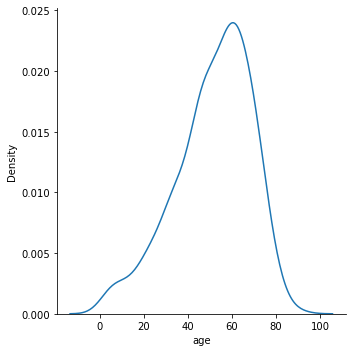

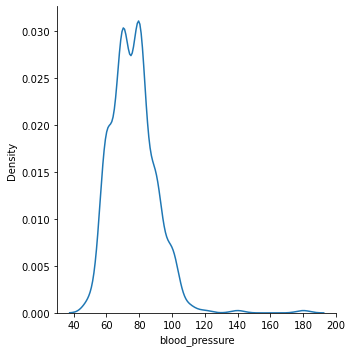

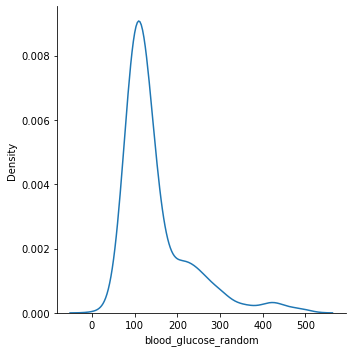

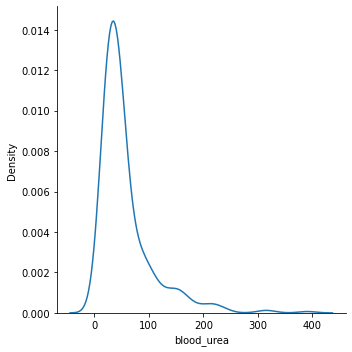

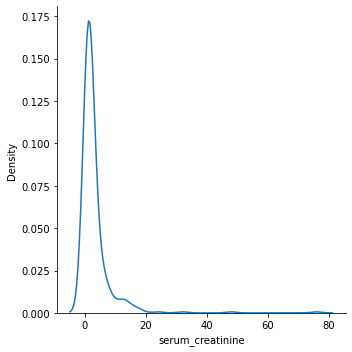

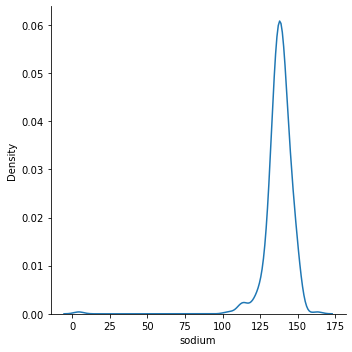

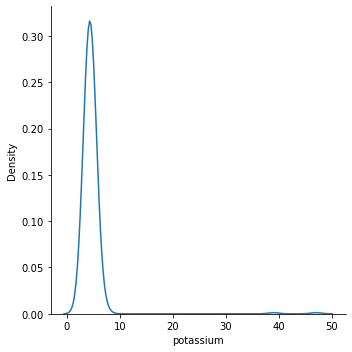

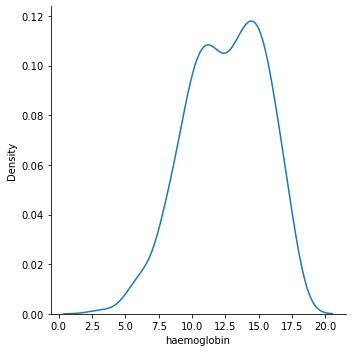

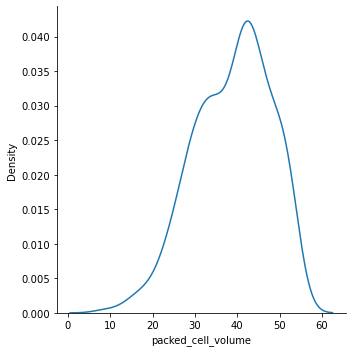

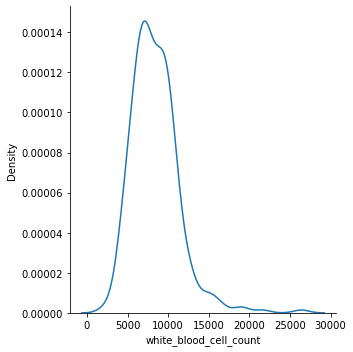

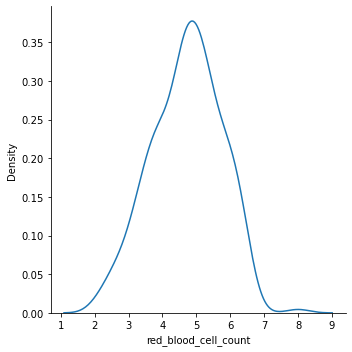

In [37]:
# checking numerical features distribution

plt.figure(figsize=(20,12))

# looping over num cols and checking its distribution
for col in num_cols:
    sns.displot(chronic_df[col],kind='kde')

In [38]:
# let's see the cols in cat col list
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

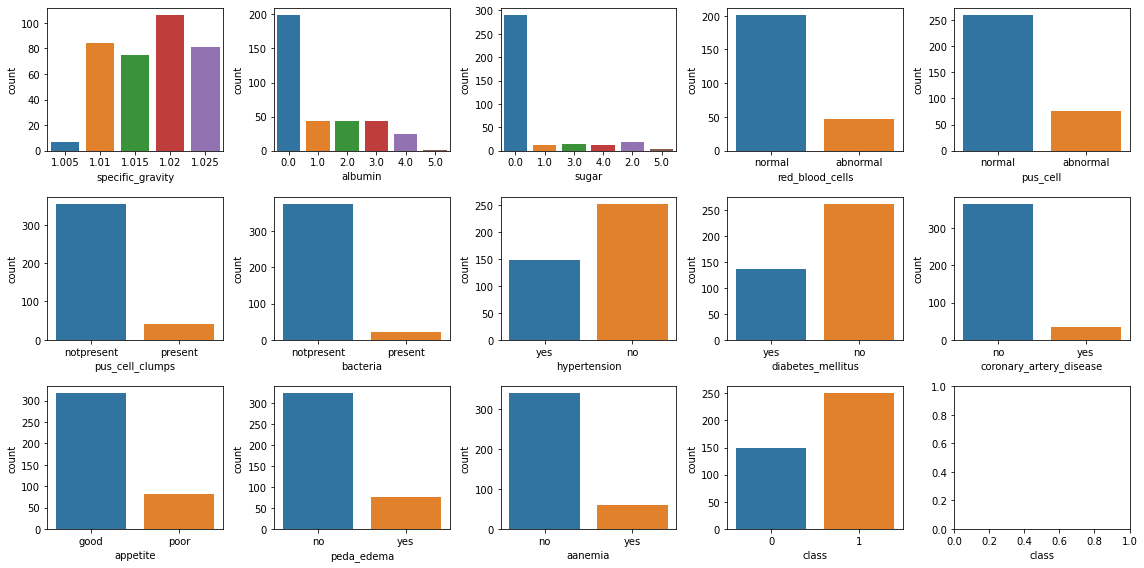

In [39]:
# checking cat features distribution

# create the figure and axes

fig, axes = plt.subplots(3, 5, figsize=(16,8))

axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot
for col,ax in zip(cat_cols,axes):
    sns.countplot(data=chronic_df,x=col,ax=ax)
    plt.xlabel(col)
    fig.tight_layout()

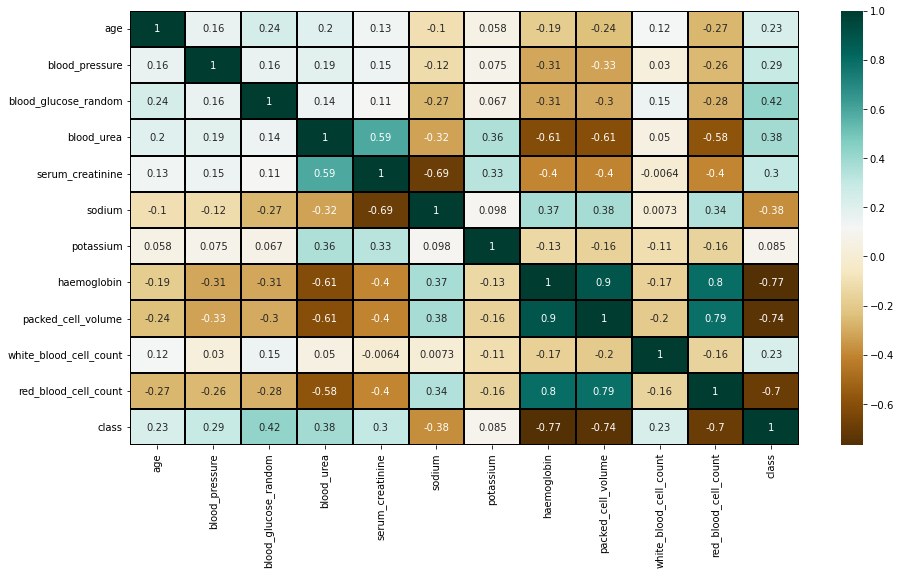

In [43]:
# correlated heatmap of data

plt.figure(figsize = (15, 8))
sns.heatmap(chronic_df.corr(),annot=True,linewidths=2,linecolor='k',cmap='BrBG')
plt.show()         # target depends strongly on haemoglobin=0.77,packed_cell_vol=0.74,red_blood_cell_count=0.7,sodium=0.38

In [44]:
# let's check count of null values in whole df
chronic_df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [45]:
# let's check count of null values in num_cols
chronic_df[num_cols].isna().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [46]:
# let's check count of null values in cat cols
chronic_df[cat_cols].isna().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

## **`Missing Value Treatment`**

In [47]:
# filling null values, we will use two methods, random sampling for higher null values and 
# if out of 10 values 5 values are null replace with mean,median,mode doesnt make any sence because much of deviation of data
# mean/mode sampling for lower null values

# creating func for imputing random values
def random_value_imputation(feature):
    random_sample = chronic_df[feature].dropna().sample(chronic_df[feature].isna().sum()) # sum of samples=sum of null values in column
    random_sample.index = chronic_df[chronic_df[feature].isnull()].index       # we provided them with index
    chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample    # filling value with random value extracted in random sampling
    
# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)  # fill null value with mode(most occured value or 'string' in categorical column)

In [48]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)

In [50]:
# let's check count of null values in num_cols again
chronic_df[num_cols].isnull().sum()

age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [51]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')    # see histogram for "red_blood_cells" and "pus_cell" conclude that
random_value_imputation('pus_cell')

In [53]:
# let's check count of null values in cat_cols again
chronic_df[cat_cols].isna().sum().sort_values(ascending=False)

sugar                      49
specific_gravity           47
albumin                    46
pus_cell_clumps             4
bacteria                    4
hypertension                2
diabetes_mellitus           2
coronary_artery_disease     2
appetite                    1
peda_edema                  1
aanemia                     1
red_blood_cells             0
pus_cell                    0
class                       0
dtype: int64

In [54]:
for col in cat_cols:
    impute_mode(col)

In [56]:
chronic_df[cat_cols].isnull().sum()                # now our data is prepared with no null values

specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [57]:
chronic_df.head()             # All null(NaN) values removed from each columns(both categorical & numerical)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,144.0,4.5,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,109.0,18.0,0.8,140.0,3.0,11.3,38.0,6000.0,4.2,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,128.0,3.8,9.6,31.0,7500.0,4.9,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,147.0,2.8,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [58]:
# check unique values in each cat col by looping over cat cols
for col in cat_cols:
    print(f"{col} has {chronic_df[col].nunique()} categories\n")

specific_gravity has 5 categories

albumin has 6 categories

sugar has 6 categories

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



### Data Preprocessing & Scaling

In [59]:
# using labelencoder and applying on categorical cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols[3:]:
    chronic_df[col] = le.fit_transform(chronic_df[col])

In [60]:
# check chronic df after transforming cat cols
chronic_df.head()            # now all the string i.e categorical columns are converted with 0's,1's... with labelencoder
                             # Here now we have cleared all the cleaning & preprocessing steps 
                             # now go ahead with model building start with x,y splitting upto evaluation

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,144.0,4.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,109.0,18.0,0.8,140.0,3.0,11.3,38.0,6000.0,4.2,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,128.0,3.8,9.6,31.0,7500.0,4.9,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,147.0,2.8,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [86]:
chronic_df.head() 

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,144.0,4.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,109.0,18.0,0.8,140.0,3.0,11.3,38.0,6000.0,4.2,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,128.0,3.8,9.6,31.0,7500.0,4.9,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,147.0,2.8,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [68]:
chronic_df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int32
pus_cell                     int32
pus_cell_clumps              int32
bacteria                     int32
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int32
diabetes_mellitus            int32
coronary_artery_disease      int32
appetite                     int32
peda_edema                   int32
aanemia                      int32
class                        int64
dtype: object

In [69]:
chronic_df[num_cols].dtypes

age                       float64
blood_pressure            float64
blood_glucose_random      float64
blood_urea                float64
serum_creatinine          float64
sodium                    float64
potassium                 float64
haemoglobin               float64
packed_cell_volume        float64
white_blood_cell_count    float64
red_blood_cell_count      float64
dtype: object

In [73]:
chronic_df.head()                                                        # Now we have done with final preprocessing & scaling

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,144.0,4.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,109.0,18.0,0.8,140.0,3.0,11.3,38.0,6000.0,4.2,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,128.0,3.8,9.6,31.0,7500.0,4.9,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,147.0,2.8,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,1


### Splitting Features & Target

In [87]:
# Split data into features and target variables (X and y)
x = chronic_df.drop('class',axis=1)
y = chronic_df['class']

In [88]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)

## **`Model Building`**

In [90]:
# import KNeighborsClassifier, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # parameter req for classification problem

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test,knn.predict(x_test))

print(f"Training Accuracy of KNN Model is {accuracy_score(y_train,knn.predict(x_train))}")
print(f"Test Accuracy of KNN Model is {accuracy_score(y_test,knn.predict(x_test))} \n")

print(f"Confusion Matrix :-  \n{confusion_matrix(y_test,knn.predict(x_test))}\n") # we have lots of FP, FN ,go ahead other model
print(f"Classification Report :-  \n{classification_report(y_test,knn.predict(x_test))}")
# when model has no=0 FP & FN ,then model is used where we do not want any FP,FN, in the dataset (model has train=1.0,test=0.68)

Training Accuracy of KNN Model is 0.775
Test Accuracy of KNN Model is 0.625 

Confusion Matrix :-  
[[28 16]
 [29 47]]

Classification Report :-  
              precision    recall  f1-score   support

           0       0.49      0.64      0.55        44
           1       0.75      0.62      0.68        76

    accuracy                           0.62       120
   macro avg       0.62      0.63      0.62       120
weighted avg       0.65      0.62      0.63       120



In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

lr = LogisticRegression()

lr.fit(x_train,y_train)

lr_acc = accuracy_score(y_test,lr.predict(x_test))

print(f"Training Accuracy of KNN Model is {accuracy_score(y_train,lr.predict(x_train))}")
print(f"Test Accuracy of KNN Model is {accuracy_score(y_test,lr.predict(x_test))} \n")

print(f"Confusion Matrix :-  \n{confusion_matrix(y_test,lr.predict(x_test))}\n")
print(f"Classification Report :-  \n{classification_report(y_test,lr.predict(x_test))}")

Training Accuracy of KNN Model is 0.9035714285714286
Test Accuracy of KNN Model is 0.8833333333333333 

Confusion Matrix :-  
[[39  5]
 [ 9 67]]

Classification Report :-  
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        44
           1       0.93      0.88      0.91        76

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120



In [ ]:
# lr = LogisticRegression(C=1.0,solver='liblinear',multi_class='ovr')

In [92]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

# accuracy score, confusion matrix and classification report of decision tree

y_pred=dtc.predict(x_test)
print(y_pred)

dtc_acc = accuracy_score(y_test,dtc.predict(x_test))
print(dtc_acc)

print(f"Training Accuracy of Decision Tree Classifier Model is {accuracy_score(y_train,dtc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier Model is {accuracy_score(y_test,dtc.predict(x_test))} \n")

print(f"Confusion Matrix :-  \n{confusion_matrix(y_test,dtc.predict(x_test))}\n") 
print(f"Classification Report :-  \n{classification_report(y_test,dtc.predict(x_test))}")

[1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1
 0 0 0 0 0 1 0 0 0]
0.9666666666666667
Training Accuracy of Decision Tree Classifier Model is 1.0
Test Accuracy of Decision Tree Classifier Model is 0.9666666666666667 

Confusion Matrix :-  
[[44  0]
 [ 4 72]]

Classification Report :-  
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       1.00      0.95      0.97        76

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [94]:
print(list(y_test))

[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]


In [96]:
# hyper parameter tuning of decision tree , import GridSearchCV
# we now perform hyperparameter tuning on dtc using gridsearchcv, passing dtc as a basemodel
from sklearn.model_selection import GridSearchCV 

grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

# Apply gridsearchcv with cv = 5, n_jobs = -1, verbose = 1
grid_search_dtc = GridSearchCV(dtc,grid_param,cv=5,n_jobs=-1,verbose=1)

# we have total 6k fits on combination of this hyperparameter total count will be 6k fits using cross validation as 5
grid_search_dtc.fit(x_train,y_train) 

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [97]:
# print best parameters and best score in grid search dtc
print(grid_search_dtc.best_params_)

print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'best'}
0.9857142857142858


In [99]:
# storing best estimator

dt = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dt_acc = accuracy_score(y_test,dt.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train,dt.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {accuracy_score(y_test,dt.predict(x_test))} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test,dt.predict(x_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test,dt.predict(x_test))}")

Training Accuracy of Decision Tree Classifier is 0.9714285714285714
Test Accuracy of Decision Tree Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[44  0]
 [ 2 74]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.97      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [100]:
dt = grid_search_dtc.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=3)

In [101]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(x_train,y_train)


# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test,rd_clf.predict(x_test))

print(f"Training Accuracy of Random Forest Classifier Model is {accuracy_score(y_train,rd_clf.predict(x_train))}")
print(f"Test Accuracy of Random Forest Classifier Model is {accuracy_score(y_test,rd_clf.predict(x_test))} \n")

print(f"Confusion Matrix :-  \n{confusion_matrix(y_test,rd_clf.predict(x_test))}\n") 
print(f"Classification Report :-  \n{classification_report(y_test,rd_clf.predict(x_test))}")

Training Accuracy of Random Forest Classifier Model is 1.0
Test Accuracy of Random Forest Classifier Model is 1.0 

Confusion Matrix :-  
[[44  0]
 [ 0 76]]

Classification Report :-  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [102]:
# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test,ada.predict(x_test))


print(f"Training Accuracy of AdaBoost Classifier Model is {accuracy_score(y_train,ada.predict(x_train))}")
print(f"Test Accuracy of AdaBoost Classifier Model is {accuracy_score(y_test,ada.predict(x_test))} \n")

print(f"Confusion Matrix :-  \n{confusion_matrix(y_test,ada.predict(x_test))}\n") 
print(f"Classification Report :-  \n{classification_report(y_test,ada.predict(x_test))}")

Training Accuracy of AdaBoost Classifier Model is 1.0
Test Accuracy of AdaBoost Classifier Model is 0.9916666666666667 

Confusion Matrix :-  
[[44  0]
 [ 1 75]]

Classification Report :-  
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [103]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test,gb.predict(x_test))

print(f"Training Accuracy of Gradient Boosting Classifier Model is {accuracy_score(y_train,gb.predict(x_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {accuracy_score(y_test,gb.predict(x_test))} \n")

print(f"Confusion Matrix :-  \n{confusion_matrix(y_test,gb.predict(x_test))}\n") 
print(f"Classification Report :-  \n{classification_report(y_test,gb.predict(x_test))}")

Training Accuracy of Gradient Boosting Classifier Model is 1.0
Test Accuracy of Gradient Boosting Classifier Model is 0.9916666666666667 

Confusion Matrix :-  
[[44  0]
 [ 1 75]]

Classification Report :-  
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [104]:
!pip install catboost

In [105]:
# import CatBoostClassifier
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train,y_train)

# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test,cat.predict(x_test))

print(f"Training Accuracy of CatBoost Classifier Model is {accuracy_score(y_train,cat.predict(x_train))}")
print(f"Test Accuracy of CatBoost Classifier Model is {accuracy_score(y_test,cat.predict(x_test))} \n")

print(f"Confusion Matrix :-  \n{confusion_matrix(y_test,cat.predict(x_test))}\n") 
print(f"Classification Report :-  \n{classification_report(y_test,cat.predict(x_test))}")

Learning rate set to 0.005982
0:	learn: 0.6824545	total: 161ms	remaining: 2m 41s
1:	learn: 0.6735180	total: 166ms	remaining: 1m 23s
2:	learn: 0.6645785	total: 170ms	remaining: 56.6s
3:	learn: 0.6561471	total: 174ms	remaining: 43.3s
4:	learn: 0.6494240	total: 177ms	remaining: 35.3s
5:	learn: 0.6411766	total: 180ms	remaining: 29.8s
6:	learn: 0.6318419	total: 183ms	remaining: 26s
7:	learn: 0.6242379	total: 186ms	remaining: 23.1s
8:	learn: 0.6146144	total: 189ms	remaining: 20.9s
9:	learn: 0.6060846	total: 193ms	remaining: 19.1s
10:	learn: 0.5972131	total: 196ms	remaining: 17.6s
11:	learn: 0.5905792	total: 198ms	remaining: 16.3s
12:	learn: 0.5830481	total: 201ms	remaining: 15.2s
13:	learn: 0.5745144	total: 203ms	remaining: 14.3s
14:	learn: 0.5665085	total: 206ms	remaining: 13.5s
15:	learn: 0.5599251	total: 209ms	remaining: 12.8s
16:	learn: 0.5532023	total: 211ms	remaining: 12.2s
17:	learn: 0.5463740	total: 214ms	remaining: 11.7s
18:	learn: 0.5395612	total: 216ms	remaining: 11.2s
19:	learn: 

In [121]:
# comparing all models accuracy by creating a df

models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNeighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 
             'AdaBoost Classifier','Gradient Boosting Classifier', 'CatBoost Classifier'],
    'Score':[lr_acc, knn_acc, dt_acc, rd_clf_acc, ada_acc, gb_acc, cat_acc]
})

models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest Classifier,1.000000
4,AdaBoost Classifier,0.991667
5,Gradient Boosting Classifier,0.991667
2,Decision Tree Classifier,0.983333
6,CatBoost Classifier,0.975000
0,Logistic Regression,0.883333
1,KNeighbors Classifier,0.625000


In [112]:
y_test[:10]

209    1
280    0
33     1
210    1
93     1
84     1
329    0
94     1
266    0
126    1
Name: class, dtype: int64

In [117]:
print(list(y_test[:10]))

[1, 0, 1, 1, 1, 1, 0, 1, 0, 1]


In [114]:
y_pred=lr.predict(x_test)

In [115]:
y_pred[:10]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [116]:
print(list(y_pred[:10]))

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1]


In [118]:
chronic_df_Actual_Pred = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})

In [120]:
# Predictions from Logistic Regression Model
chronic_df_Actual_Pred.head(10)   # Here we get only one wrong prediction out of 10 predictions , which is really good !!)

,Actual,Predicted
209,1,1
280,0,0
33,1,1
210,1,1
93,1,1
84,1,1
329,0,0
94,1,1
266,0,1
126,1,1


## Conclusion ==>

### We have done all the nessacery steps before building models like data connection, data analysis, EDA, missing value treatment(data cleaning), data preprocessing, scaling , fitting the model on training data for prediction & then select the best generalized model for deployment porpose, as best performing model able to classify weather the person is having chronic kidney disease or not !!

### As we know our classification(binary) use case have very small dataset, boosting & tree based algorithms are the results of overfit i.e these models req. lagre dataset to trained properly, Hence we use here a simple Logistic Regression model as we have binary classification problem, model gives 90% training accuracy & 88% testing accuracy which is good generalized model and we use Logistic regression model for prediction & deployment !!